In [1]:
import pandas as pd

# Define column names based on the information you provided
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", 
    "marital_status", "occupation", "relationship", "race", "sex", 
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load the dataset into a pandas DataFrame
df1 = pd.read_csv('income_data.csv', names=column_names, skipinitialspace=True)

# Display the first few rows of the DataFrame to verify the data loading
print(df1.head())   

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [2]:
df = df1.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# Find null values in all columns
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# Select object columns for encoding
object_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding for object columns
df_encoded = pd.get_dummies(df, columns=object_cols)

# Print the first few rows to verify the encoding
print(df_encoded.head())


   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0        False                  False                False   
1        False                  False                False   
2        False                  False                False   
3        False                  False                False   
4        False                  False                False   

   workclass_Never-worked  ...  native_country_Scotland  native_country_South  \
0                   False  ...                    False                 False   
1 

In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 110 entries, age to income_>50K
dtypes: bool(104), int64(6)
memory usage: 4.7 MB


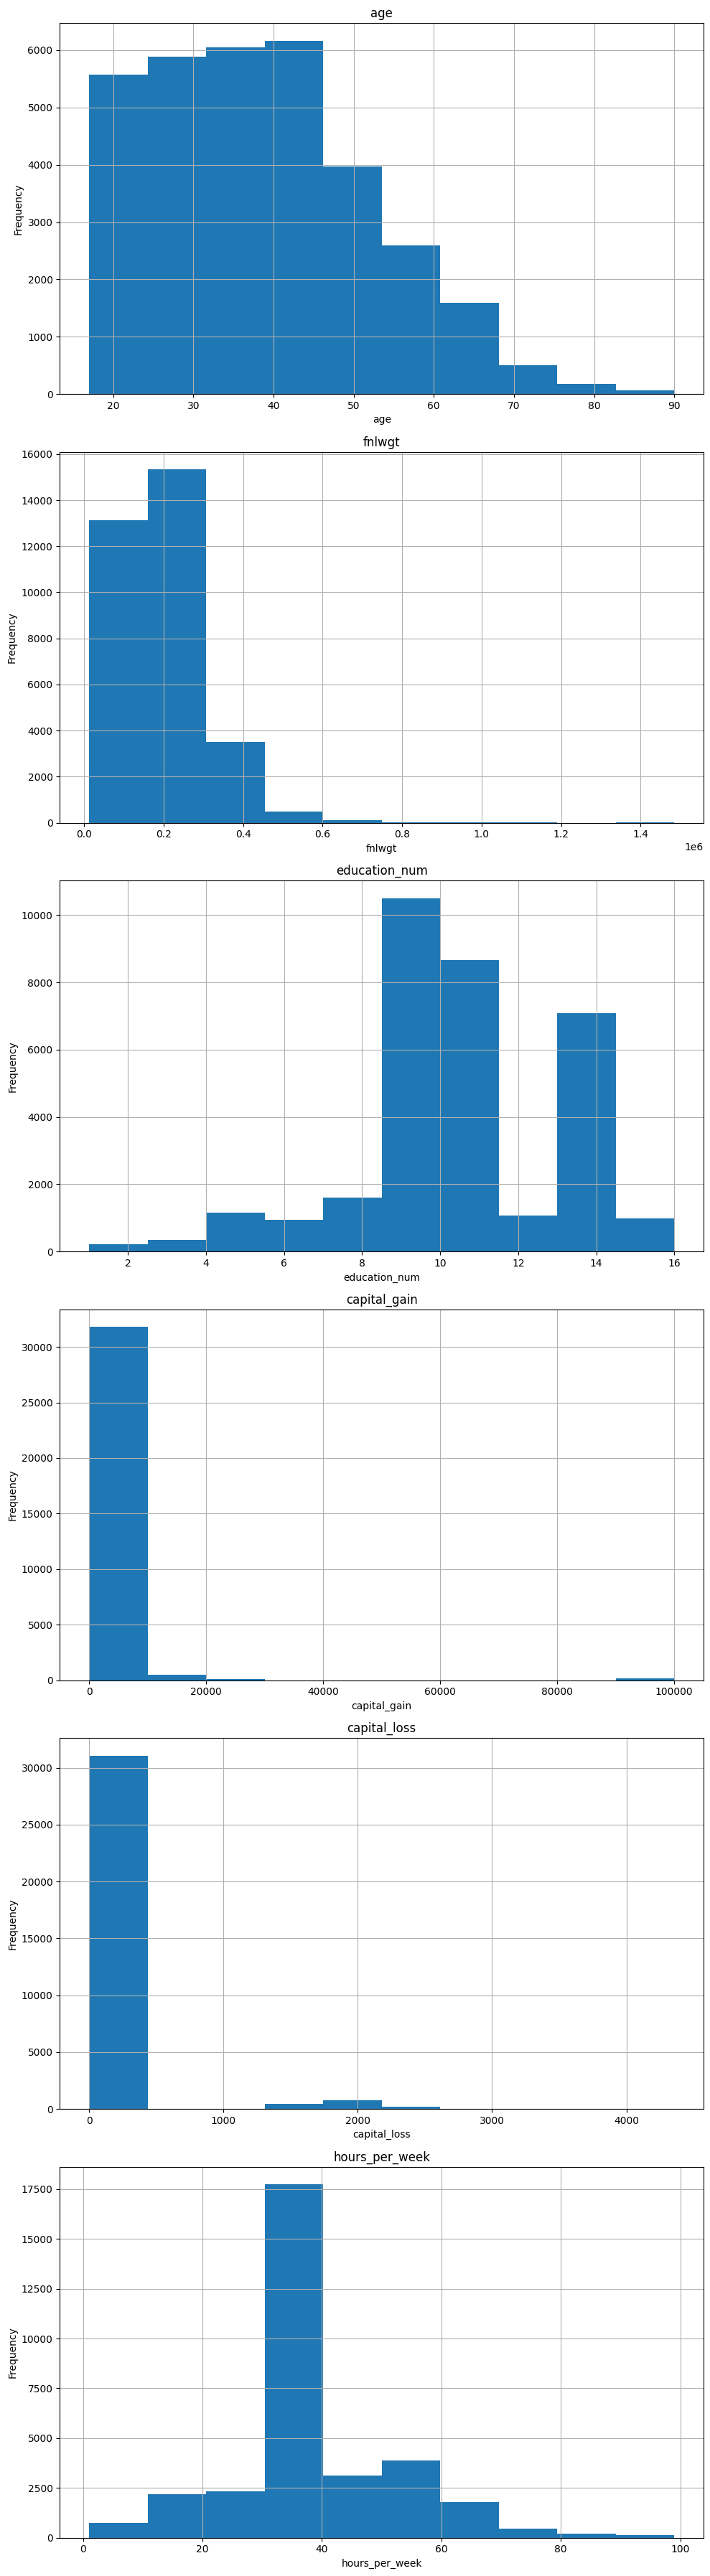

In [8]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64']).columns

# Set up subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 6*len(numerical_cols)))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    ax = axes[i] if len(numerical_cols) > 1 else axes  # Handle single column case
    df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


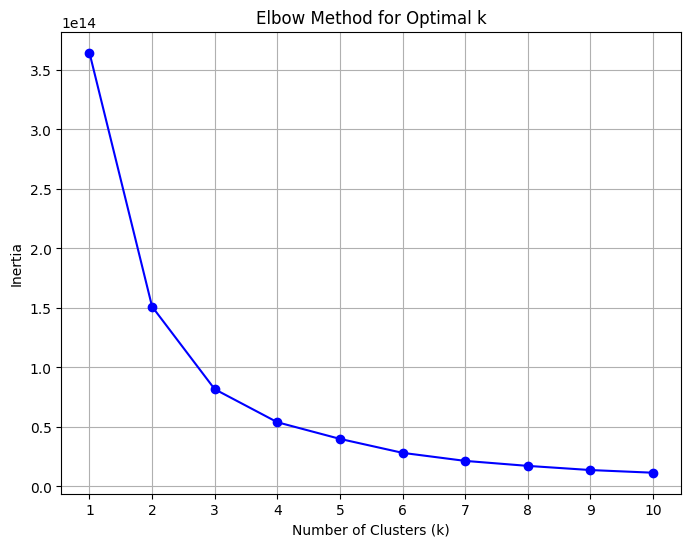

In [9]:
from sklearn.cluster import KMeans
import numpy as np 


# Select numerical columns for clustering
X = df_encoded.select_dtypes(include=['int64'])

# Define the range of number of clusters to try
k_range = range(1, 11)  # Try clusters from 1 to 10

# Fit K-means clustering for each value of k and calculate inertia
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


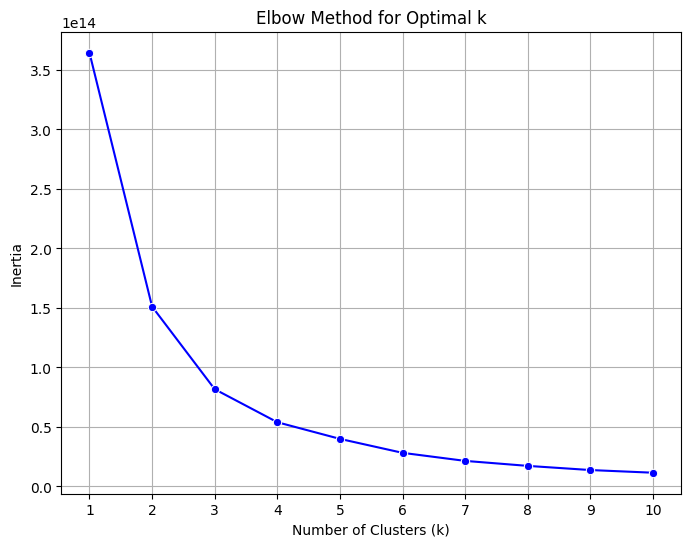

In [10]:
import seaborn as sns

# Select numerical columns for clustering
X = df_encoded.select_dtypes(include=['int64'])

# Define the range of number of clusters to try
k_range = range(1, 11)  # Try clusters from 1 to 10

# Fit K-means clustering for each value of k and calculate inertia
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_range, y=inertia, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


In [11]:
# Define the number of clusters
num_clusters = 3

# Initialize K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the K-means model to the data and predict cluster labels
cluster_labels = kmeans.fit_predict(X)

# Get the centroids
centroids = kmeans.cluster_centers_

# Print the centroids
print(centroids)


[[3.83291003e+01 2.06000137e+05 1.00565454e+01 1.04565498e+03
  8.57244756e+01 4.03213293e+01]
 [3.96766617e+01 9.40399405e+04 1.01764951e+01 1.09706455e+03
  9.16694986e+01 4.06520906e+01]
 [3.66460757e+01 3.78624858e+05 9.91812989e+00 1.13546435e+03
  8.15039137e+01 4.02811508e+01]]


In [12]:
for center in centroids:
    print(center[1])

206000.1367197373
94039.94052973503
378624.8576264023


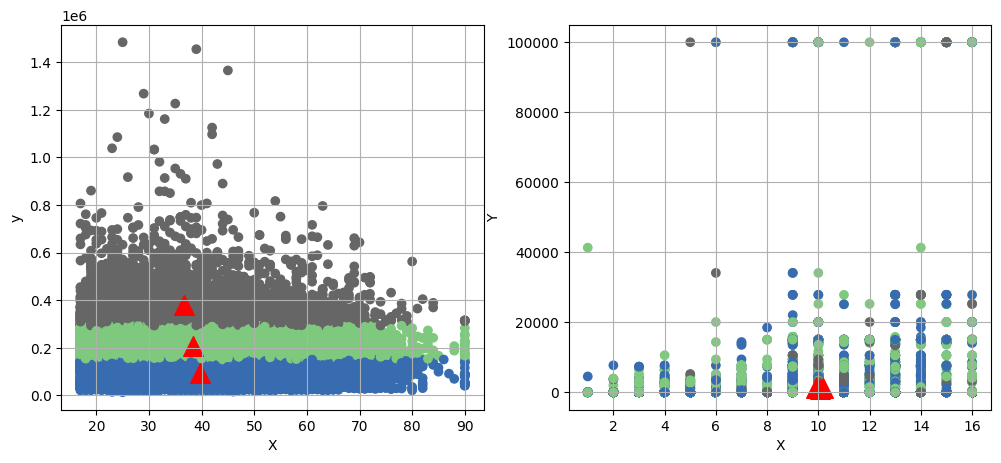

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm


# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot the first subplot
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap=cm.Accent)
plt.grid(True)
for center in centroids:
    center = center[:2]
    plt.scatter(center[0], center[1], marker='^', c='red', s=200)  # Draw centroids
plt.xlabel("X")
plt.ylabel( "y")

# Plot the second subplot 
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=cluster_labels, cmap=cm.Accent)
plt.grid(True)
for center in centroids:
    center = center[2:4]
    plt.scatter(center[0], center[1], marker='^', c='red', s=200)  # Draw centroids
plt.xlabel( "X" )
plt.ylabel( "Y" )
   
# Show the plot   
plt.show()    
